In [1]:
import sys
sys.path.append('/Users/celiaberon/GitHub/mouse_bandit/data_preprocessing_code')
sys.path.append('/Users/celiaberon/GitHub/mouse_bandit')
import support_functions as sf
import numpy as np
import pandas as pd
import scipy as sp
import scipy.io as scio
import bandit_preprocessing as bp
import sys
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
record = pd.read_csv('/Users/celiaberon/GitHub/mouse_bandit/session_record.csv',index_col=0)
ca_data = scio.loadmat('/Volumes/Neurobio/MICROSCOPE/Celia/data/k7_03142017_test/neuron_master.mat',squeeze_me = True, struct_as_record = False)
#ca_data = scio.loadmat('/Volumes/Neurobio/MICROSCOPE/Celia/data/q43_03202017_bandit_8020/q43_03202017_neuron_master.mat',squeeze_me = True, struct_as_record = False)
neuron = ca_data['neuron_results'] 

In [3]:
#plt.plot(neuron.C_raw[0, preStart:trialDecision])
nNeurons = neuron.C.shape[0]

# remove neurons that have NaNs
nan_neurons = np.where(np.isnan(neuron.C_raw))[0]
nan_neurons = np.unique(nan_neurons)
good_neurons = [x for x in range(0, nNeurons) if x not in nan_neurons]
nan_neurons

array([ 3,  6, 11, 14, 21, 22, 24, 29, 31, 32, 33, 37, 52, 53, 57, 58, 62,
       63, 65, 68, 70, 79, 83, 89, 91, 94])

(<matplotlib.axes._subplots.AxesSubplot at 0x110e44b38>,
 [<matplotlib.lines.Line2D at 0x110ec9d30>])

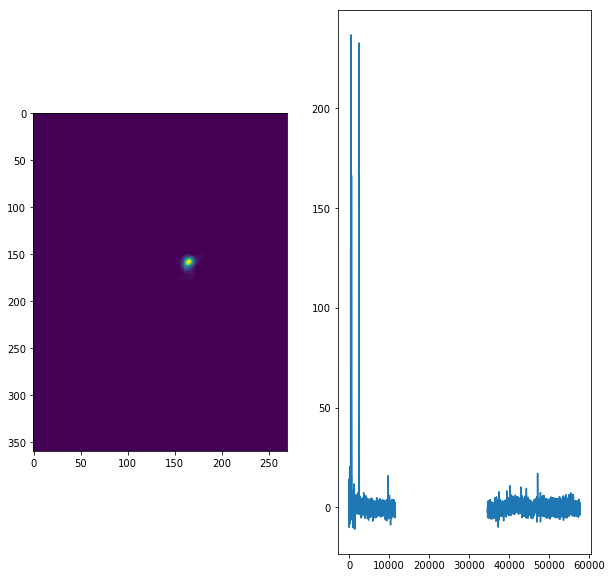

In [4]:
iNeuron = 3

plt.figure(figsize=(10,10))
temp = np.reshape(neuron.A[:,iNeuron], (360, 270))
plt.subplot(1,2,1), plt.imshow(temp)
plt.subplot(1,2,2), plt.plot(neuron.C_raw[iNeuron,:])

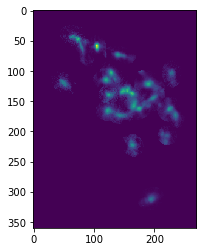

In [5]:
nan_neurons = 3, 6, 11, 21, 22, 24, 29, 31, 32, 33, 37, 52, 53, 57, 58, 62, 63, 65, 68, 70, 79, 83, 89, 91, 94
neuron_pos = np.zeros((360,270, len(nan_neurons)))
count = 0
for iNeuron in nan_neurons:
    neuron_pos[:,:,count] = np.reshape(neuron.A[:,iNeuron], (360, 270))
    count = count+1
plt.imshow(np.mean(neuron_pos, axis=2))
